Trying to apply hyperparameter seach for the KMeans clustering algorithm on the DarkSky dataset 

In [9]:
%pylab inline
import yt
import sklearn
yt.funcs.mylog.setLevel(50) #coerce output null

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import cross_val_score

Importing the particle data 

In [4]:
cd /project/projectdirs/astro250/doris/halo/yt-dark/

/global/project/projectdirs/astro250/doris/halo/yt-dark


In [5]:
prefix = "http://darksky.slac.stanford.edu/scivis2015/data/ds14_scivis_0128/"
ds = yt.load(prefix+"ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
x = ad[("all","particle_position_x")]
y = ad[("all","particle_position_y")]
z = ad[("all","particle_position_z")]

yt : [INFO     ] 2015-10-23 14:44:59,399 Building memmap with offset: 2720 and size 16
yt : [INFO     ] 2015-10-23 14:44:59,451 Building memmap with offset: 3104 and size 2097152
yt : [INFO     ] 2015-10-23 14:44:59,492 Calculating time to be 4.344e+17 seconds
yt : [INFO     ] 2015-10-23 14:44:59,523 Parameters: current_time              = 4.3437787319e+17
yt : [INFO     ] 2015-10-23 14:44:59,524 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2015-10-23 14:44:59,525 Parameters: domain_left_edge          = [-45417.41686962 -45417.41686962 -45417.41686962]
yt : [INFO     ] 2015-10-23 14:44:59,526 Parameters: domain_right_edge         = [ 45417.41686962  45417.41686962  45417.41686962]
yt : [INFO     ] 2015-10-23 14:44:59,527 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2015-10-23 14:44:59,528 Parameters: current_redshift          = 2.48886713461e-08
yt : [INFO     ] 2015-10-23 14:44:59,528 Parameters: omega_lambda              = 0.704962
yt : [INFO     ] 2

In [18]:
shape(x)

(2097152,)

Importing the halo catalog provided as part of the Data Release (by SUBFIND)

In [6]:
cd darksky_catalog/

/global/project/projectdirs/astro250/doris/halo/yt-dark/darksky_catalog


In [7]:
import yt
import numpy as np
from yt.utilities.lib.image_utilities import add_rgba_points_to_image
from darksky_catalog import darksky
filtered_catalog =darksky['ds14_a']['filtered_1e15_a_1.0000']

In [10]:
filtered_catalog.get_halo(3)

(2573.74609375, 4400.4296875, 2438.5810546875, 170.69931030273438, -178.6830596923828, -269.6794738769531, 5967416286773248.0, 7118018161147904.0, 4287023217115136.0, 2829745376985088.0, 859232098320384.0, 2682.095947265625, 1804.38330078125, 4.698720455169678, 0.024555811658501625, 0.6881513595581055, 22578031121, -1)

In [21]:
def get_halo(self):
    ds = self.load()
#     offset = ds['id'][n]
    catalog = self.parent[self.halo_catalog].load(midx = -1)
    return  catalog.sdf_container.structs

In [23]:
get_halo(filtered_catalog)[-1][10]

array([ (13.368721008300781, 3.1736860275268555, 7.173592567443848, 83.88713836669922, -115.49732208251953, -169.82952880859375, 663801167872.0, 780942573568.0, 468565557248.0, 390471286784.0, 0.0, 139.84893798828125, 85.87332153320312, 0.22493979334831238, 0.08961829543113708, 0.7047524452209473, 3, -1)], 
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('vx', '<f4'), ('vy', '<f4'), ('vz', '<f4'), ('mvir', '<f4'), ('m200b', '<f4'), ('m200c', '<f4'), ('m500c', '<f4'), ('m2500c', '<f4'), ('vmax', '<f4'), ('rvmax', '<f4'), ('r200b', '<f4'), ('spin', '<f4'), ('kin_to_pot', '<f4'), ('id', '<i8'), ('pid', '<i8')])

In [40]:
list(get_halo(filtered_catalog)[-1][14][0])[:6]

[1.5661438, 11.670724, 3.9804387, 86.891335, -113.6932, -245.24486]

In [56]:
train = []
test = []
for n in np.arange(51):
    if n >10:
        train.append(list(get_halo(filtered_catalog)[-1][n][0])[:6])
    elif n<10:
        test.append(list(get_halo(filtered_catalog)[-1][n][0])[:6])

In [57]:
len(train)

40

In [58]:
len(test)

10

Now that the data is split into training and testing set I can conduct kmeans on the training set 

In [60]:
train = np.array(train)
test = np.array(test)

In [67]:
from sklearn.cluster import KMeans
num_clusters=5
clf = KMeans(n_clusters=num_clusters)
clf.fit(train)
centers=clf.cluster_centers_
labels=clf.predict(train)

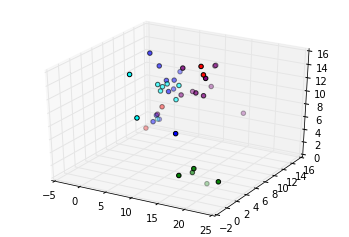

In [69]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color = ["red","green","blue","cyan","purple","orange","magenta","brown","yellow","lime"]
for i in range(num_clusters):
    group  = np.where(labels==i)
    ax.scatter(train[group,0], train[group,1],train[group,2],c=color[i])#, c=c, marker=m)

In [6]:
iris = load_iris()
# create X (features) and y (response)
X = iris.data
y = iris.target

In [8]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [15]:
# X

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Actually it is cross validated with real data , the labelled data is stored inside iris.target, the whole thing just comes with the load iris dataset 

In [16]:
# estimate of out-of-sample accuracy
print scores.mean()

0.966666666667


In [18]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


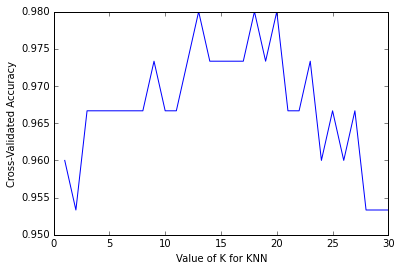

In [19]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## More efficient parameter tuning using `GridSearchCV`

Allows you to define a **grid of parameters** that will be **searched** using K-fold cross-validation

In [20]:
from sklearn.grid_search import GridSearchCV

In [22]:
# define the parameter values that should be searched
k_range = range(1, 31)
print k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [23]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [25]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=30, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

- You can set **`n_jobs = -1`** to run computations in parallel (if supported by your computer and OS)

Note:This just use up all the cores allocated to it automatically

In [26]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=30, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [27]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [29]:
# examine the first tuple
print grid.grid_scores_[1].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'n_neighbors': 2}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [15]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.95999999999999996, 0.96666666666666667, 0.95999999999999996, 0.96666666666666667, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


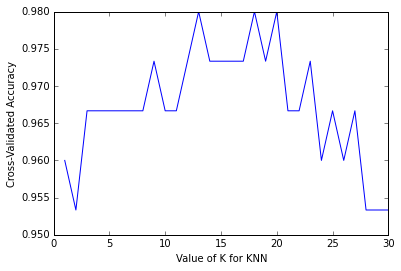

In [16]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [17]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=13, p=2, weights='uniform')


## Searching multiple parameters simultaneously

- **Example:** tuning `max_depth` and `min_samples_leaf` for a `DecisionTreeClassifier`
- Could tune parameters **independently**: change `max_depth` while leaving `min_samples_leaf` at its default value, and vice versa
- But, best performance might be achieved when **neither parameter** is at its default value

In [18]:
# define the parameter values that should be searched
k_range = range(1, 31)
weight_options = ['uniform', 'distance']

In [19]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [20]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=30, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [21]:
# view the complete results
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [22]:
# examine the best model
print grid.best_score_
print grid.best_params_

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


## Using the best parameters to make predictions

In [23]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([3, 5, 4, 2])

array([1])

In [24]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([3, 5, 4, 2])

array([1])

## Reducing computational expense using `RandomizedSearchCV`

- Searching many different parameters at once may be computationally infeasible
- `RandomizedSearchCV` searches a subset of the parameters, and you control the computational "budget"

In [25]:
from sklearn.grid_search import RandomizedSearchCV

In [26]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

- **Important:** Specify a continuous distribution (rather than a list of values) for any continous parameters

In [27]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)
rand.grid_scores_

[mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7, 'weights': 'uniform'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 17, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 28, 'weights': 'uniform'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 17, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 13, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 18, 'weights': 'distance'}]

In [28]:
# examine the best model
print rand.best_score_
print rand.best_params_

0.98
{'n_neighbors': 17, 'weights': 'distance'}


In [29]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print best_scores

[0.973, 0.973, 0.98, 0.973, 0.973, 0.98, 0.98, 0.973, 0.98, 0.98, 0.973, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.973]


## Resources

- scikit-learn documentation: [Grid search](http://scikit-learn.org/stable/modules/grid_search.html), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html), [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html)
- Timed example: [Comparing randomized search and grid search](http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html)
- scikit-learn workshop by Andreas Mueller: [Video segment on randomized search](https://youtu.be/0wUF_Ov8b0A?t=17m38s) (3 minutes), [related notebook](http://nbviewer.ipython.org/github/amueller/pydata-nyc-advanced-sklearn/blob/master/Chapter%203%20-%20Randomized%20Hyper%20Parameter%20Search.ipynb)
- Paper by Yoshua Bengio: [Random Search for Hyper-Parameter Optimization](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)

## Comments or Questions?

- Email: <kevin@dataschool.io>
- Website: http://dataschool.io
- Twitter: [@justmarkham](https://twitter.com/justmarkham)

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()